# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
%matplotlib inline
#%pip install matplotlib pandas scipy (if not already installed)

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [13]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Check the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [15]:
# Retrieve the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
#duplicate_mice = combined_data[combined_data["Mouse ID"].isin(duplicates["Mouse ID"].unique())]
#duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_data["Mouse ID"].nunique()
number_of_mice_cleaned

249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen'
drug_regimen = cleaned_data.groupby('Drug Regimen')

# Retrieve the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
tumor_mean = drug_regimen['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen['Tumor Volume (mm3)'].median()
tumor_variance = drug_regimen['Tumor Volume (mm3)'].var()
tumor_std_dev = drug_regimen['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean, 
                                     "Median Tumor Volume": tumor_median, 
                                     "Tumor Volume Variance": tumor_variance, 
                                     "Tumor Volume Std. Dev.": tumor_std_dev, 
                                     "Tumor Volume SEM": tumor_sem})
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary_agg = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_summary_agg = tumor_volume_summary_agg.rename(columns={"Mean Tumor Volume": "mean",
                                                                    "Median Tumor Volume": "median",
                                                                    "Tumor Volume Variance": "var",
                                                                    "Tumor Volume Std. Dev.": "std",
                                                                    "Tumor Volume SEM": "sem"})

# Add title to the dataframe
tumor_volume_summary_agg.index.name = "Drug Regimen"
tumor_volume_summary_agg = tumor_volume_summary_agg.style.set_caption("Tumor Volume (mm3)")
tumor_volume_summary_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

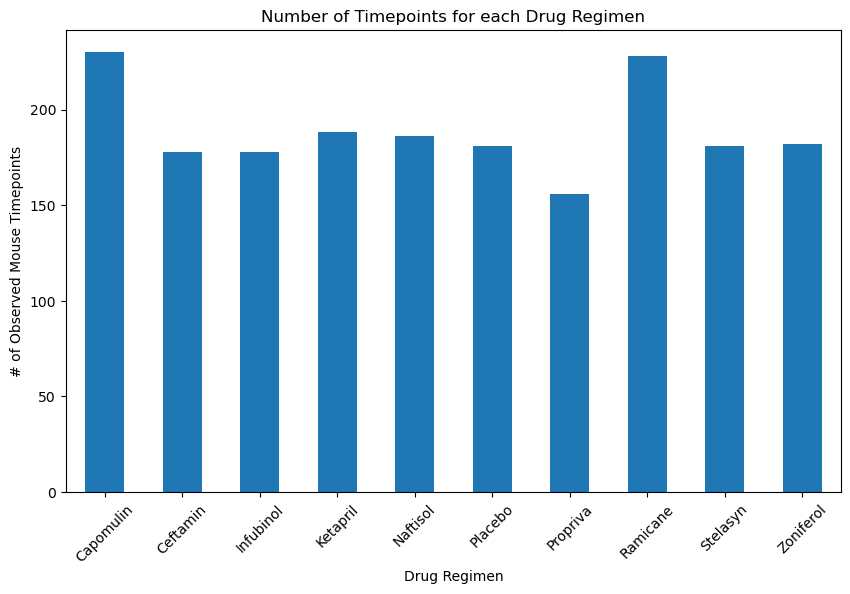

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = cleaned_data.groupby('Drug Regimen').size() 
drug_regimen_count.plot(kind='bar', 
                        title='Number of Timepoints for each Drug Regimen', 
                        xlabel='Drug Regimen', 
                        ylabel='# of Observed Mouse Timepoints', 
                        figsize=(10,6), align='center', width=0.5)

# formatting the plot
plt.xticks(rotation=45)
plt.show()


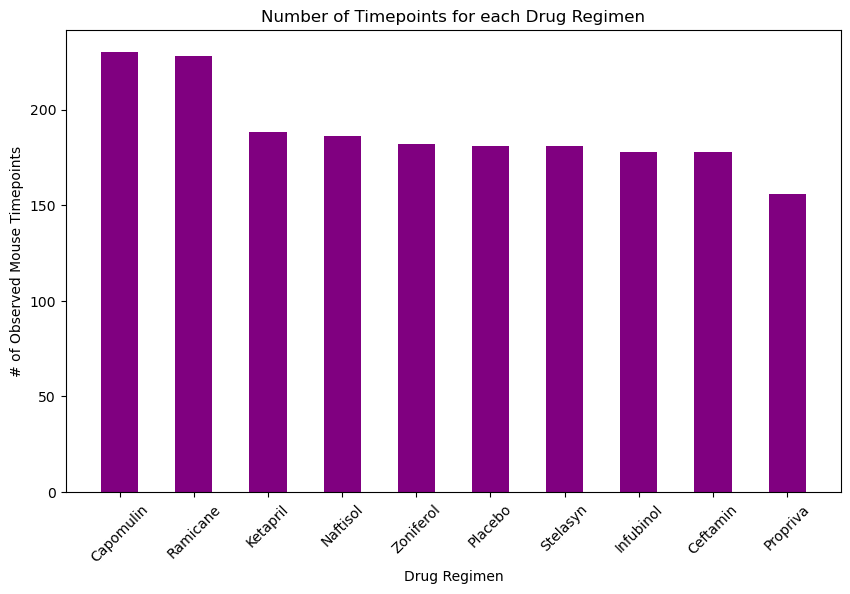

In [ ]:
# Generate a bar plot (using Pyplot) showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(drug_count.index, drug_count.values, facecolor='purple', align='center', width=0.5)

# Set the title and labels and readability of the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.title('Number of Timepoints for each Drug Regimen')

plt.show()

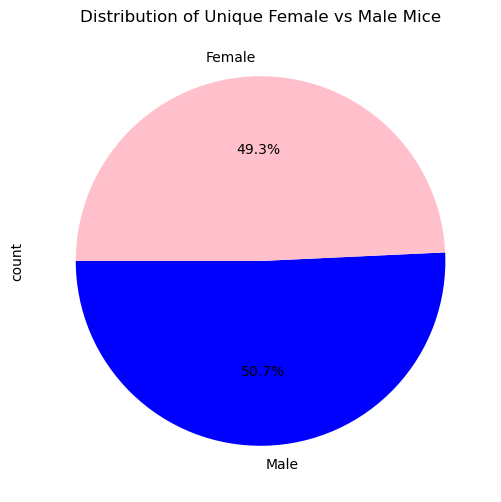

In [51]:
# Get the unique mice with their gender and generate a pie chart (pandas)
#unique_mice = cleaned_data[['Mouse ID', 'Sex']].count()
# Count the number of unique female and male mice in the dataset
gender_count = cleaned_data['Sex'].value_counts()

# Create pie chart (pandas)
gender_count.plot(kind='pie', autopct='%1.1f%%', 
                  startangle=180, figsize=(6,6), 
                  title='Distribution of Unique Female vs Male Mice', 
                  colors=['blue', 'pink'])

# show the plot
plt.ylabel('count')
plt.show()

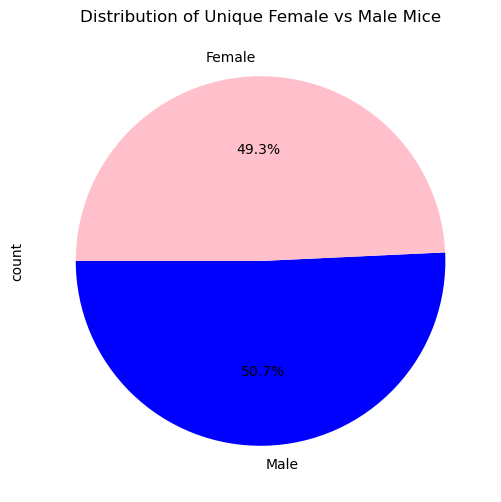

In [53]:
# Get the unique mice with their gender and generate a pie chart (pyplot)
#unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice in the dataset
gender_count = cleaned_data['Sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', 
        startangle=180, colors=['blue', 'pink'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')

plt.show()


## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to include only the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add subset
    tumor_volume_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles.loc[.25]
    upperq = quartiles.loc[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Print outlier results for each treatment
    print(f"{treatment}'s potential outliers: {treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/mp/thd95nvx4mx5cz9q4kvwptn40000gn/T/ipykernel_1231/692030279.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=25));


<Figure size 1500x1000 with 0 Axes>

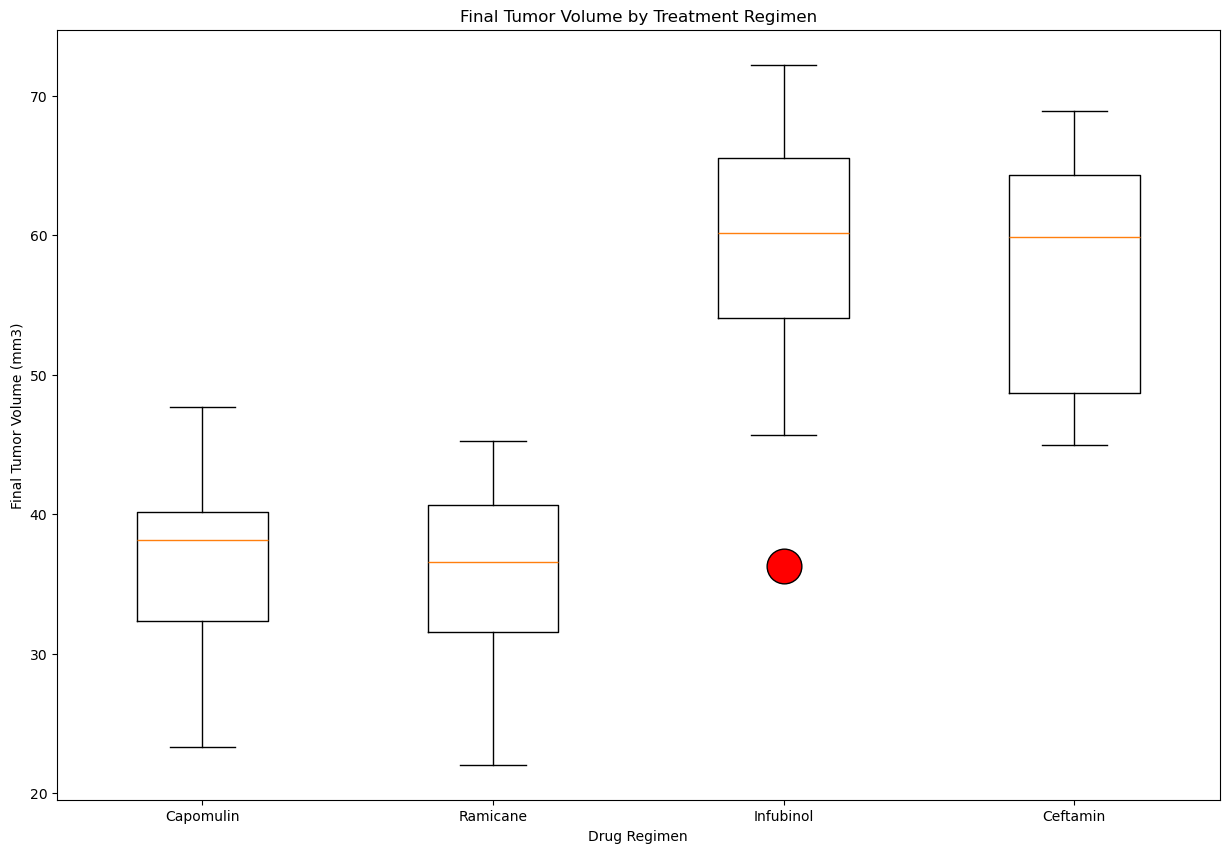

In [66]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(15,10))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=25));

# Add title and labels
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

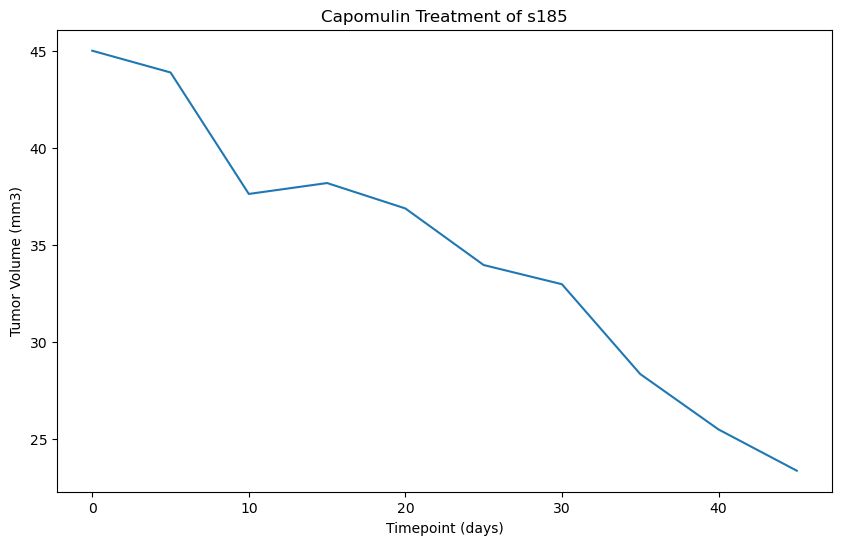

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data to include only Capomulin treatment
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin
single_mouse_ID = capomulin_data['Mouse ID'].iloc[0]
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_ID]

# Generate the line plot
plt.figure(figsize=(10,6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

# Add title and labels
plt.title(f'Capomulin Treatment of {single_mouse_ID}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


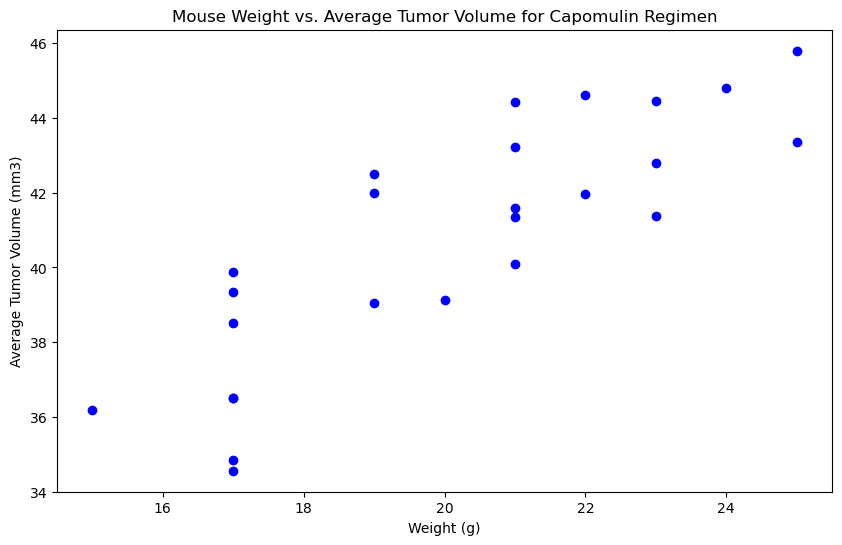

In [68]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse weight
mouse_weight_vs_tumor_volume = pd.merge(average_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'], color='blue')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


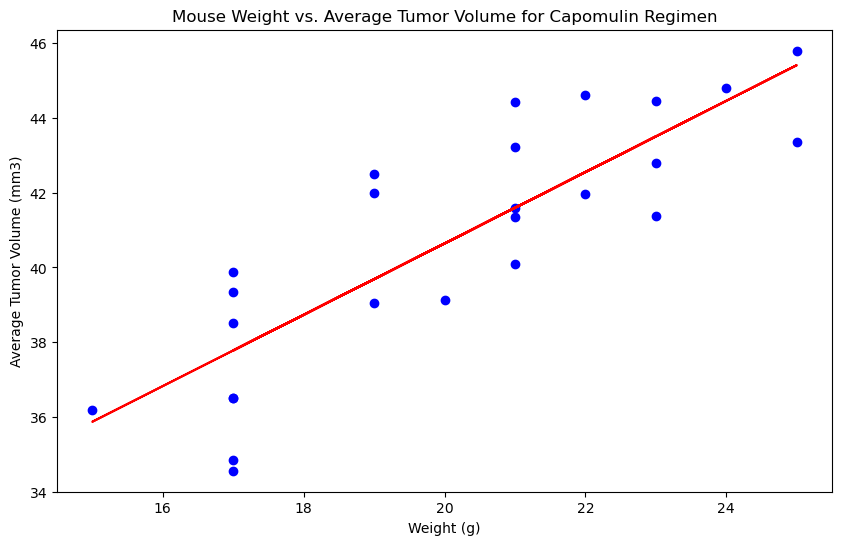

In [72]:
# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'])

# Create a scatter plot with the regression line
plt.figure(figsize=(10,6))
plt.scatter(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'], color='blue', label='Data')
plt.plot(mouse_weight_vs_tumor_volume['Weight (g)'], intercept + slope * mouse_weight_vs_tumor_volume['Weight (g)'], color='red', label='Fitted line')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
# Data generated by Mockaroo Links to an external site., LLC (2022). Realistic Data Generator.